# Test
This script serve as an example on how to use the package, and as a test in developing it

Created on 04.06.2024
@author: Mathias Berg Rosendal, PhD Student at DTU Management (Energy Economics & Modelling)

In [1]:
### 0.1 Use development scripts or the package installed from pip
use_development = True
if use_development:
    import sys
    import os
    # Adjust the sys.path to include the project root directory
    project_root = os.path.abspath(os.path.join(os.path.dirname("__file__"), '..'))
    if project_root not in sys.path:
        sys.path.insert(0, project_root)
    from src.pybalmorel import IncFile, MainResults, Balmorel
    from src.pybalmorel.utils import symbol_to_df
else:
    from pybalmorel import IncFile, MainResults, Balmorel
    from pybalmorel.utils import symbol_to_df

## 1. Working with Outputs

This section presents examples of how to work with the outputs from Balmorel

### 1.1 MainResults

The main output from Balmorel is MainResults.gdx, which may be loaded from one path (demanding different filenames, e.g., MainResults_SC1.gdx, MainResults_SC2.gdx, etc.) or several paths (which by default gives scenario names of SC1, SC2, ..., SCN format if no list of scenario_names are provided)

In [2]:
### 1.1.1 Loading one scenario
res = MainResults(files='MainResults_Example1.gdx', paths='Files')

# Getting a result in DataFrame format
res.get_result('PRO_YCRAGF')

c:\Users\mberos\gitRepos\pybalmorel\tests\Files\MainResults_Example1.gdx


,Scenario,Year,Country,Region,Area,Generation,Fuel,Commodity,Technology,Unit,Value
0,Example1,2030,DENMARK,DK1,DK1_Large,GNR_BO_MSW_E-106_LS-35-MW-FEED_Y-2030,MUNIWASTE,HEAT,BOILERS,TWh,-8.797088e-17
1,Example1,2030,DENMARK,DK1,DK1_Large,GNR_ENG_BGAS_BP_E-36,BIOGAS,HEAT,CHP-BACK-PRESSURE,TWh,7.072683e-04
2,Example1,2030,DENMARK,DK1,DK1_Large,GNR_ENG_BGAS_BP_E-36,BIOGAS,ELECTRICITY,CHP-BACK-PRESSURE,TWh,5.799600e-04
3,Example1,2030,DENMARK,DK1,DK1_Large,GNR_ENG_BGAS_BP_E-39,BIOGAS,HEAT,CHP-BACK-PRESSURE,TWh,2.278976e-03
4,Example1,2030,DENMARK,DK1,DK1_Large,GNR_ENG_BGAS_BP_E-39,BIOGAS,ELECTRICITY,CHP-BACK-PRESSURE,TWh,1.868760e-03
...,...,...,...,...,...,...,...,...,...,...,...
247,Example1,2050,DENMARK,DK2,DK2_VRE-ONS_SP277-HH100_RG1,GNR_WT-SP277-HH100_ONS_LS_L-RG1_Y-2030,WIND,ELECTRICITY,WIND-ON,TWh,7.214518e-01
248,Example1,2050,DENMARK,DK2,DK2_VRE-ONS_SP277-HH100_RG2,GNR_WT-SP277-HH100_ONS_LS_L-RG2_Y-2030,WIND,ELECTRICITY,WIND-ON,TWh,2.082185e+00
249,Example1,2050,DENMARK,DK2,DK2_VRE-ONS_SP277-HH100_RG2,GNR_WT-SP277-HH100_ONS_LS_L-RG2_Y-2050,WIND,ELECTRICITY,WIND-ON,TWh,5.335354e-01
250,Example1,2050,DENMARK,DK2,DK2_VRE-ONS_SP277-HH100_RG3,GNR_WT-SP277-HH100_ONS_LS_L-RG3_Y-2030,WIND,ELECTRICITY,WIND-ON,TWh,2.618147e+00


In [3]:
### 1.1.2 Loading several scenarios
res = MainResults(files=['MainResults_Example1.gdx', 'MainResults_Example2.gdx'], paths='Files', scenario_names=['SC1', 'SC2'])

res.get_result('G_CAP_YCRAF')

c:\Users\mberos\gitRepos\pybalmorel\tests\Files\MainResults_Example1.gdx
c:\Users\mberos\gitRepos\pybalmorel\tests\Files\MainResults_Example2.gdx


,Scenario,Year,Country,Region,Area,Generation,Fuel,Commodity,Technology,Category,Unit,Value
0,SC1,2030,DENMARK,DK1,DK1_Large,GNR_BO_BIOIL_E-79,BIOOIL,HEAT,BOILERS,EXOGENOUS,GW,0.005500
1,SC1,2030,DENMARK,DK1,DK1_Large,GNR_BO_BIOIL_E-79,BIOOIL,HEAT,BOILERS,DECOMMISSIONING,GW,-0.005500
2,SC1,2030,DENMARK,DK1,DK1_Large,GNR_BO_BIOIL_E-85,BIOOIL,HEAT,BOILERS,EXOGENOUS,GW,0.109900
3,SC1,2030,DENMARK,DK1,DK1_Large,GNR_BO_BIOIL_E-85,BIOOIL,HEAT,BOILERS,DECOMMISSIONING,GW,-0.109900
4,SC1,2030,DENMARK,DK1,DK1_Large,GNR_BO_BIOIL_E-93,BIOOIL,HEAT,BOILERS,EXOGENOUS,GW,0.023200
...,...,...,...,...,...,...,...,...,...,...,...,...
4545,SC2,2050,DENMARK,DK2,DK2_VRE-ONS_SP277-HH100_RG1,GNR_WT-SP277-HH100_ONS_LS_L-RG1_Y-2050,WIND,ELECTRICITY,WIND-ON,ENDOGENOUS,GW,0.027004
4546,SC2,2050,DENMARK,DK2,DK2_VRE-ONS_SP277-HH100_RG2,GNR_WT-SP277-HH100_ONS_LS_L-RG2_Y-2030,WIND,ELECTRICITY,WIND-ON,ENDOGENOUS,GW,0.616990
4547,SC2,2050,DENMARK,DK2,DK2_VRE-ONS_SP277-HH100_RG2,GNR_WT-SP277-HH100_ONS_LS_L-RG2_Y-2050,WIND,ELECTRICITY,WIND-ON,ENDOGENOUS,GW,0.158096
4548,SC2,2050,DENMARK,DK2,DK2_VRE-ONS_SP277-HH100_RG3,GNR_WT-SP277-HH100_ONS_LS_L-RG3_Y-2030,WIND,ELECTRICITY,WIND-ON,ENDOGENOUS,GW,0.602747


GridBox(children=(Dropdown(description='Table:', options=('F_CONS_YCRA', 'F_CONS_YCRAST', 'G_CAP_YCRAF', 'G_ST…

Output()

Stack(children=(GridBox(children=(SelectMultiple(description='Scenario', index=(0,), options=('None',), value=…

Output()

Output()

Output()

Output()

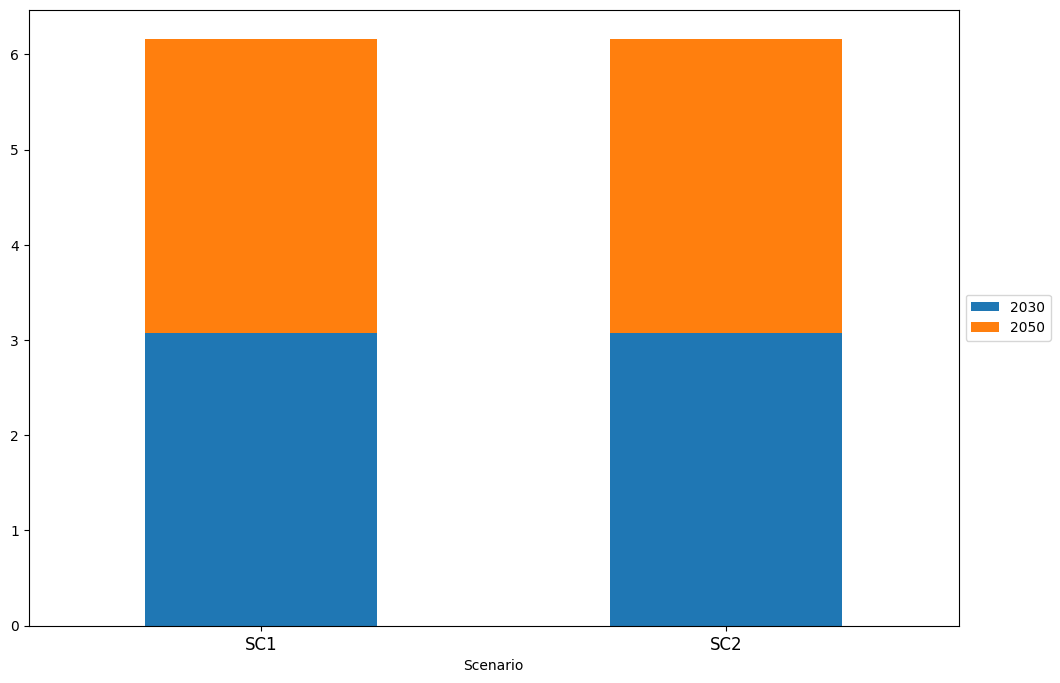

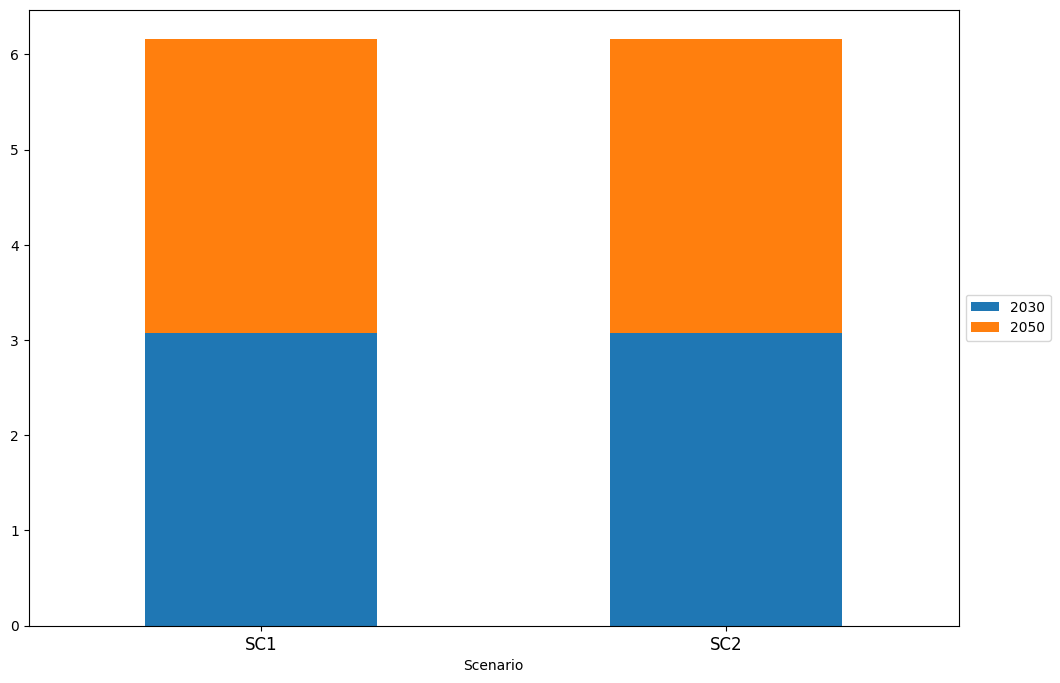

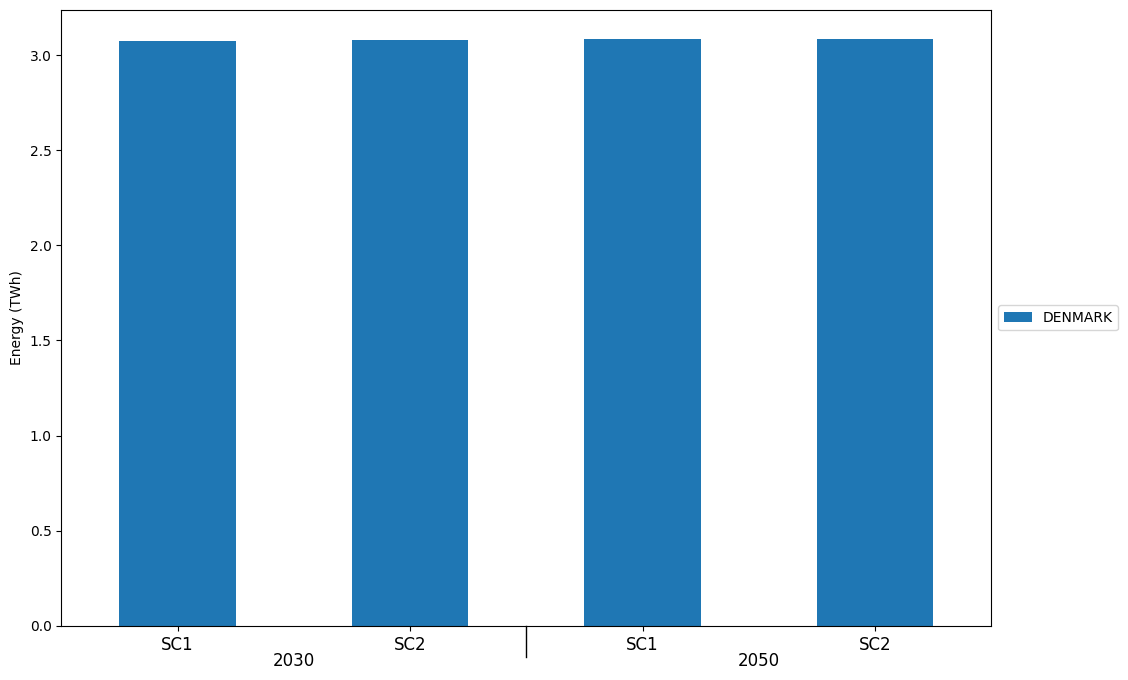

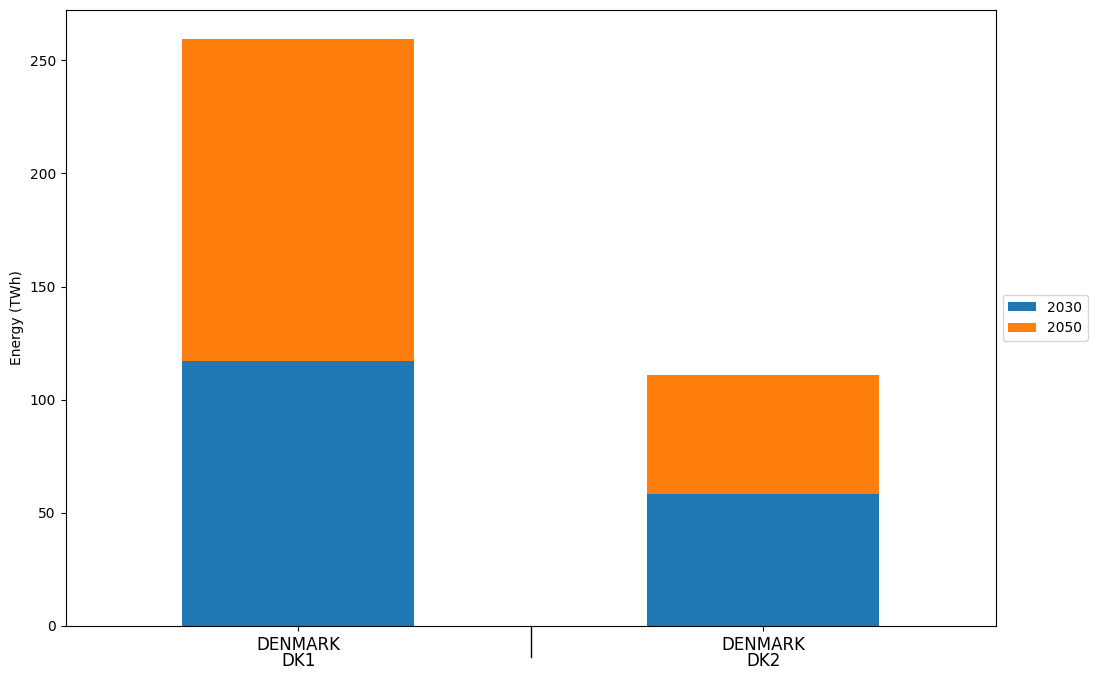

In [4]:
### 1.1.3 Plotting bar charts with an interactive gui
res.interactive_bar_chart()

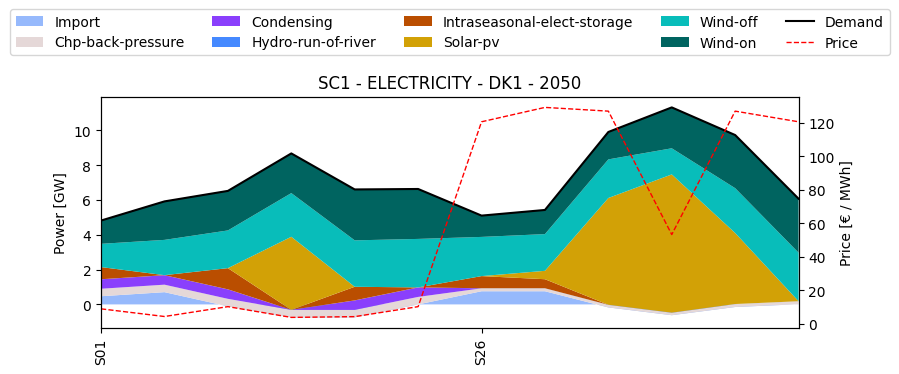

In [5]:
### 1.1.4 Plotting production profiles
fig, ax = res.plot_profile(scenario='SC1', year=2050, commodity='Electricity', columns='Technology',
                 region='DK1')


Found MainResults in Files\MainResults_Example2.gdx


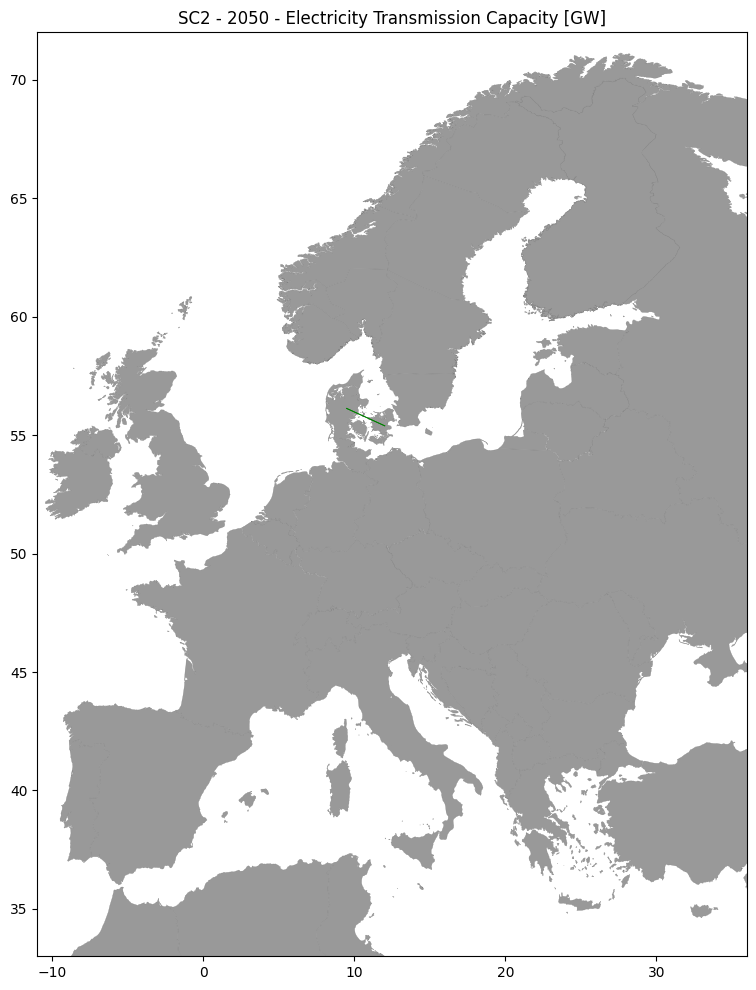

In [6]:
### 1.1.5 Plotting map of transmission capacity
fig, ax = res.plot_map('SC2', 'Electricity', 2050)

### 1.2 Other General Functions

In [7]:
### Using symbol_to_df
import gams
import os
ws = gams.GamsWorkspace()
db = ws.add_database_from_gdx(os.path.abspath('files/MainResults_Example1.gdx'))

fuel = symbol_to_df(db, 'F_CONS_YCRA')
fuel        

,Year,Country,Region,Area,Generation,Fuel,Technology,Unit,Value
0,2030,DENMARK,DK1,DK1_Large,GNR_BO_MSW_E-106_LS-35-MW-FEED_Y-2030,MUNIWASTE,BOILERS,TWh,-8.299139e-17
1,2030,DENMARK,DK1,DK1_Large,GNR_ENG_BGAS_BP_E-36,BIOGAS,CHP-BACK-PRESSURE,TWh,1.611000e-03
2,2030,DENMARK,DK1,DK1_Large,GNR_ENG_BGAS_BP_E-39,BIOGAS,CHP-BACK-PRESSURE,TWh,4.791692e-03
3,2030,DENMARK,DK1,DK1_Large,GNR_ENG_BGAS_BP_E-40,BIOGAS,CHP-BACK-PRESSURE,TWh,6.390300e-04
4,2030,DENMARK,DK1,DK1_Large,GNR_ENG_BGAS_BP_E-41,BIOGAS,CHP-BACK-PRESSURE,TWh,2.584585e-03
...,...,...,...,...,...,...,...,...,...
186,2050,DENMARK,DK2,DK2_VRE-ONS_SP277-HH100_RG1,GNR_WT-SP277-HH100_ONS_LS_L-RG1_Y-2030,WIND,WIND-ON,TWh,7.214518e-01
187,2050,DENMARK,DK2,DK2_VRE-ONS_SP277-HH100_RG2,GNR_WT-SP277-HH100_ONS_LS_L-RG2_Y-2030,WIND,WIND-ON,TWh,2.082185e+00
188,2050,DENMARK,DK2,DK2_VRE-ONS_SP277-HH100_RG2,GNR_WT-SP277-HH100_ONS_LS_L-RG2_Y-2050,WIND,WIND-ON,TWh,5.335354e-01
189,2050,DENMARK,DK2,DK2_VRE-ONS_SP277-HH100_RG3,GNR_WT-SP277-HH100_ONS_LS_L-RG3_Y-2030,WIND,WIND-ON,TWh,2.618147e+00


## 2. Inputs

This section presents examples of how to work with inputs to Balmorel

### 2.1 .inc Files

In [8]:
### 2.1.1 Create an .inc file
import pandas as pd

# Initiate .inc file class
DE = IncFile(name='DE',
            prefix="TABLE   DE1(RRR,DEUSER,YYY)   'Annual electricity consumption (MWh)'\n",
            suffix="\n;\nDE(YYY,RRR,DEUSER) = DE1(RRR,DEUSER,YYY);",
            path='files')


# Create annual electricity demand 
DE.body = pd.DataFrame(index=['DK1', 'DK2'], columns=[2030, 2040, 2050],
                       data=[[17e6, 20e6, 25e6],
                            [14e6, 17e6, 20e6]])

# Fix the index format (in this case, append the DEUSER set to RRR)
DE.body.index += ' . RESE'

# Save .inc file to path (will save as ./Balmorel/sc1/data/DE.inc)
DE.save()

### 2.2 Balmorel Class

The Balmorel class can be used to recognise scenarios, run scenarios and easily collect results 

In [ ]:
# Initiate Model Class
model = Balmorel('path/to/model/folder')
print(model.scenarios) # Print recognised scenarios

# Run Model
model.run('base', {'some_cmd_line_option' : 'arg'})

# Collect MainResults into model.results
model.collect_results()
model.results.get_result('OBJ_YCR') # Get objective function